# **Installing required packages**

In [30]:
#!pip install vanna

In [20]:
import vanna
from vanna.remote import VannaDefault
#from vanna.types.database import DatabaseConnection

# **API connection with Vanna**

In [7]:
api_key= '570f0c73ebba4c828e372e3cc440b65e'
vanna_modelname = 'vanna_pilot1'
vn = VannaDefault(api_key=api_key, model=vanna_modelname)

In [21]:
vn.connect_to_sqlite('/content/sample_data/sakila.db')

# **Training**






In [22]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")
df_ddl

,type,sql
0,table,CREATE TABLE actor (\n actor_id numeric NOT N...
1,index,CREATE INDEX idx_actor_last_name ON actor(last...
2,trigger,CREATE TRIGGER actor_trigger_ai AFTER INSERT O...
3,trigger,CREATE TRIGGER actor_trigger_au AFTER UPDATE O...
4,table,CREATE TABLE country (\n country_id SMALLINT ...
...,...,...
70,view,CREATE VIEW customer_list\nAS\nSELECT cu.custo...
71,view,CREATE VIEW film_list\nAS\nSELECT film.film_id...
72,view,CREATE VIEW staff_list\nAS\nSELECT s.staff_id ...
73,view,CREATE VIEW sales_by_store\nAS\nSELECT\n s.st...


In [24]:
for ddl in df_ddl['sql'].to_list():
  vn.train(ddl = ddl)

Adding ddl: CREATE TABLE actor (
  actor_id numeric NOT NULL ,
  first_name VARCHAR(45) NOT NULL,
  last_name VARCHAR(45) NOT NULL,
  last_update TIMESTAMP NOT NULL,
  PRIMARY KEY  (actor_id)
  )
Adding ddl: CREATE INDEX idx_actor_last_name ON actor(last_name)

Adding ddl: CREATE TRIGGER actor_trigger_ai AFTER INSERT ON actor
 BEGIN
  UPDATE actor SET last_update = DATETIME('NOW')  WHERE rowid = new.rowid;
 END
Adding ddl: CREATE TRIGGER actor_trigger_au AFTER UPDATE ON actor
 BEGIN
  UPDATE actor SET last_update = DATETIME('NOW')  WHERE rowid = new.rowid;
 END
Adding ddl: CREATE TABLE country (
  country_id SMALLINT NOT NULL,
  country VARCHAR(50) NOT NULL,
  last_update TIMESTAMP,
  PRIMARY KEY  (country_id)
)
Adding ddl: CREATE TRIGGER country_trigger_ai AFTER INSERT ON country
 BEGIN
  UPDATE country SET last_update = DATETIME('NOW')  WHERE rowid = new.rowid;
 END
Adding ddl: CREATE TRIGGER country_trigger_au AFTER UPDATE ON country
 BEGIN
  UPDATE country SET last_update = DATETIM

In [31]:
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,345955-ddl,ddl,None,CREATE INDEX idx_rental_fk_customer_id ON rent...
1,345909-ddl,ddl,None,CREATE TRIGGER category_trigger_ai AFTER INSER...
2,345937-ddl,ddl,None,CREATE TRIGGER inventory_trigger_au AFTER UPDA...
3,345891-ddl,ddl,None,CREATE INDEX idx_actor_last_name ON actor(last...
4,345926-ddl,ddl,None,CREATE TRIGGER film_actor_trigger_au AFTER UPD...
...,...,...,...,...
73,345914-ddl,ddl,None,CREATE INDEX idx_customer_last_name ON custome...
74,345900-ddl,ddl,None,CREATE TRIGGER city_trigger_au AFTER UPDATE ON...
75,345942-ddl,ddl,None,CREATE TRIGGER staff_trigger_au AFTER UPDATE O...
76,345927-ddl,ddl,None,CREATE TABLE film_category (\n film_id INT NO...


# **Asking questions to Vanna about DB**

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX idx_fk_city_id ON address(city_id)\n\n\nCREATE INDEX idx_fk_country_id ON city(country_id)\n\n\nCREATE TABLE city (\n  city_id int NOT NULL,\n  city VARCHAR(50) NOT NULL,\n  country_id SMALLINT NOT NULL,\n  last_update TIMESTAMP NOT NULL,\n  PRIMARY KEY  (city_id),\n  CONSTRAINT fk_city_country FOREIGN KEY (country_id) REFERENCES country (country_id) ON DELETE NO ACTION ON UPDATE CASCADE\n)\n\nCREATE TRIGGER city_trigger_ai AFTER INSERT ON city\n BEGIN\n  UPDATE city SET last_update = DATETIME('NOW')  WHERE rowid = new.rowid;\n END\n\nCREATE TRIGGER city_trigger_au AFTER UPDATE ON city\n BEGIN\n  UPDATE city SET last_update = DATETIME('NOW')  WHERE rowid = new.rowid;\n END\n\nCREATE TABLE country (\n  country_id SMALLI

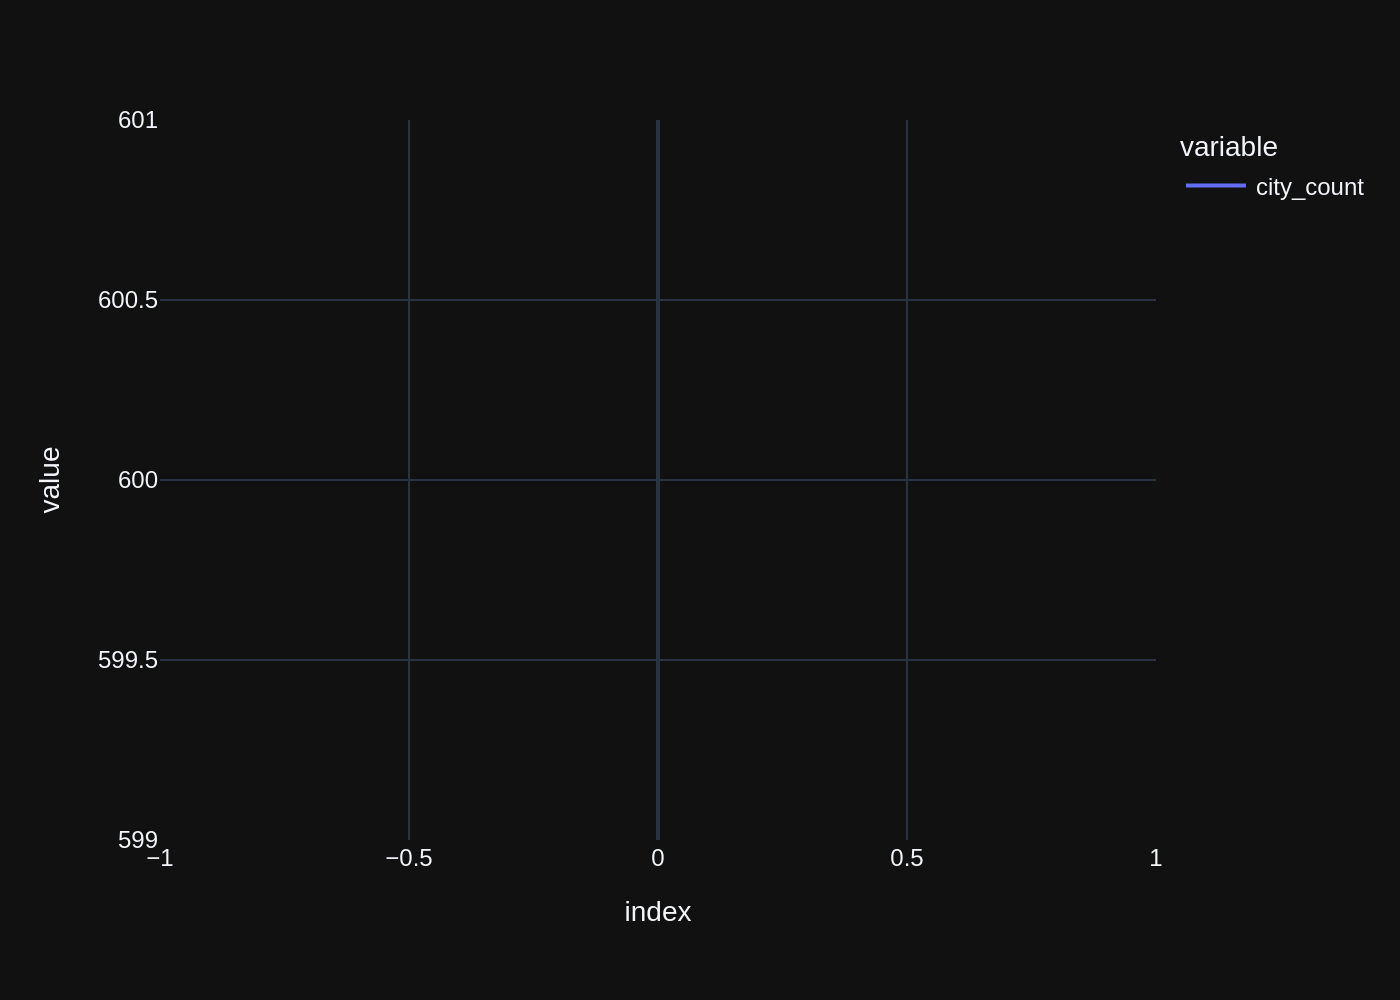

('SELECT COUNT(*) AS city_count FROM city;',
    city_count
 0         600,
 Figure({
     'data': [{'hovertemplate': 'variable=city_count<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'city_count',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': 'city_count',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([0]),
               'xaxis': 'x',
               'y': array([600]),
               'yaxis': 'y'}],
     'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
 }))

In [25]:
vn.ask( question= 'how many cities are there')

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE VIEW sales_by_film_category\nAS\nSELECT\nc.name AS category\n, SUM(p.amount) AS total_sales\nFROM payment AS p\nINNER JOIN rental AS r ON p.rental_id = r.rental_id\nINNER JOIN inventory AS i ON r.inventory_id = i.inventory_id\nINNER JOIN film AS f ON i.film_id = f.film_id\nINNER JOIN film_category AS fc ON f.film_id = fc.film_id\nINNER JOIN category AS c ON fc.category_id = c.category_id\nGROUP BY c.name\n\nCREATE INDEX idx_fk_film_id ON inventory(film_id)\n\n\nCREATE INDEX idx_fk_film_id_store_id ON inventory(store_id,film_id)\n\n\nCREATE TABLE inventory (\n  inventory_id INT NOT NULL,\n  film_id INT NOT NULL,\n  store_id INT NOT NULL,\n  last_update TIMESTAMP NOT NULL,\n  PRIMARY KEY  (inventory_id),\n  CONSTRAINT fk_inven

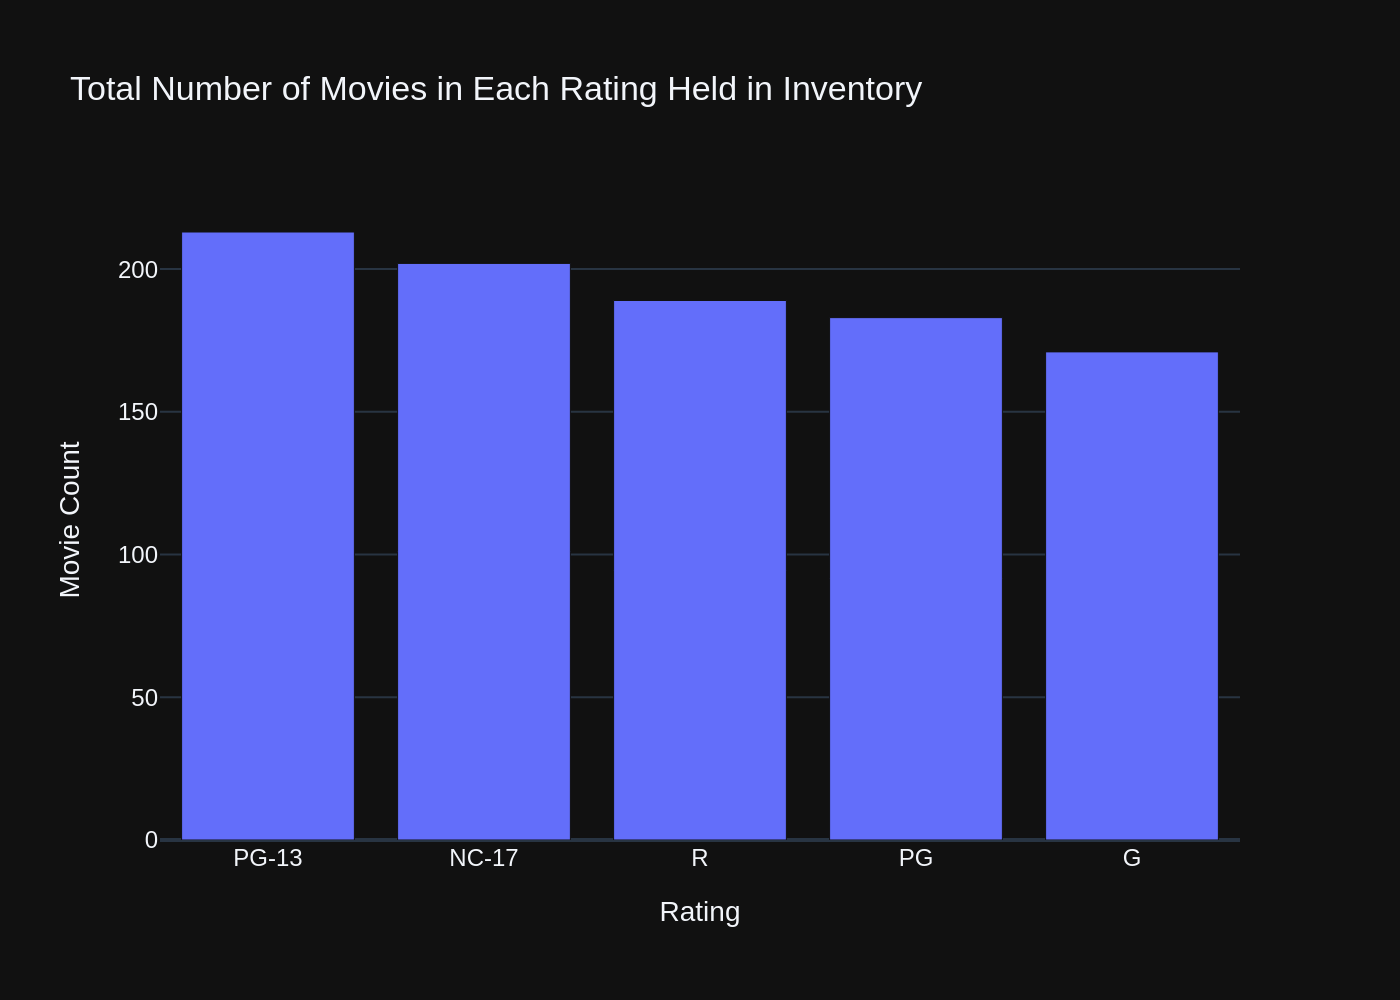

('SELECT f.rating, COUNT(DISTINCT i.film_id) AS movie_count\nFROM film AS f\nJOIN inventory AS i ON f.film_id = i.film_id\nGROUP BY f.rating\nORDER BY movie_count DESC;',
   rating  movie_count
 0  PG-13          213
 1  NC-17          202
 2      R          189
 3     PG          183
 4      G          171,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Rating=%{x}<br>Movie Count=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['PG-13', 'NC-17', 'R', 'PG', 'G'], dtype=object),
               'xaxis': 'x',
               'y': array([213, 202, 189, 183, 171]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'le

In [27]:
vn.ask( question= 'what is the total number of movies in each rating  held in inventory? sort them in descending')


# **Asking Questions via Application**

In [30]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Google Colab doesn't support running websocket servers. Disabling debug mode.
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

Your app is running at:
https://mj47a1dej0j-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
Info: None
None
SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE VIEW customer_list\nAS\nSELECT cu.customer_id AS ID,\n       cu.first_name||' '||cu.last_name AS name,\n       a.address AS address,\n       a.postal_code AS zip_code,\n       a.phone AS phone,\n       city.city AS city,\n       country.country AS country,\n       case when cu.active=1 then 'active' else '' end AS notes,\n       cu.store_id AS SID\nFROM customer AS cu JOIN address AS a ON cu.address_id = a.address_id JOIN city ON a.city_id = city.city_id\n    JOIN country ON city.country_id = country.country_id\n\nCREATE INDEX idx_customer_fk_store_id ON customer